<a href="https://colab.research.google.com/github/dtoralg/INESDI_Data-Science_ML_IA/blob/main/%5B01%5D%20-%20Preparaci%C3%B3n%20de%20datos%20y%20EDA/EDA_Ejercicio_1_Exploraci%C3%B3n_completa_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Ejercicio 1: Exploración completa de datos (I do)

**Contexto:** vamos a realizar una exploración detallada del dataset Titanic, uno de los más utilizados para introducir técnicas básicas de ciencia de datos.

## 1) Introducción

El objetivo de este ejercicio es entender cómo abordar la primera fase del análisis de datos: la exploración inicial. Trabajaremos con un dataset clásico (Titanic) para identificar los tipos de variables, comprender su distribución, detectar nulos, duplicados, outliers y realizar algunas visualizaciones clave. Este análisis es fundamental antes de cualquier tarea de modelado o predicción, ya que permite detectar problemas y oportunidades en los datos.

## 2) Objetivos

- Comprender la estructura general de un dataset y los distintos tipos de variables.
- Detectar problemas comunes en los datos: nulos, duplicados, tipos erróneos y outliers.
- Aplicar visualizaciones básicas para entender distribuciones y relaciones entre variables.

## 3) Descripción breve de los datos

- **Origen:** Dataset Titanic (Kaggle / seaborn). Datos reales de pasajeros del Titanic.
- **Filas:** 891
- **Columnas:** 12 columnas (edad, clase, sexo, tarifa, puerto de embarque, etc.)
- **Variable objetivo (en otras tareas):** `Survived` (0 = no sobrevivió, 1 = sí sobrevivió)
- Este ejercicio se centrará en la exploración, no en la predicción.

## 4) Bloques del ejercicio

### 4.1 Preparación del entorno

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)  # mostrar todas las columnas
print('Entorno preparado.')

Entorno preparado.


### 4.2 Carga del dataset

Usaremos la versión integrada del dataset Titanic de seaborn.

In [5]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 4.3 EDA: Dimensiones, tipos y muestra aleatoria

In [8]:
print('Filas y columnas:', df.shape)
print('\nTipos de datos:')
print(df.dtypes)
print('\n \n ------------------- \n \n')
df.sample(5)

Filas y columnas: (891, 15)

Tipos de datos:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

 
 ------------------- 
 



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
639,0,3,male,NaN,1,0,16.1000,S,Third,man,True,NaN,Southampton,no,False
175,0,3,male,18.0,1,1,7.8542,S,Third,man,True,NaN,Southampton,no,False
597,0,3,male,49.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
306,1,1,female,NaN,0,0,110.8833,C,First,woman,False,NaN,Cherbourg,yes,True


### 4.4 Nulos y duplicados

In [16]:
print('Porcentaje de valores nulos:')
display(round(df.isna().mean().sort_values(ascending=False)*100, 2))

print('\nFilas duplicadas:', df.duplicated().sum())

Porcentaje de valores nulos:


,0
deck,77.22
age,19.87
embarked,0.22
embark_town,0.22
sex,0.00
pclass,0.00
survived,0.00
fare,0.00
parch,0.00
sibsp,0.00



Filas duplicadas: 107


### 4.5 Estadísticos básicos y cardinalidad de columnas categóricas

In [17]:
# Numéricas
print('Descripción de variables numéricas:')
display(df.describe())

# Categóricas
print('\nCardinalidad de variables categóricas:')
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

Descripción de variables numéricas:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Cardinalidad de variables categóricas:
sex: 2 valores únicos
embarked: 3 valores únicos
who: 3 valores únicos
embark_town: 3 valores únicos
alive: 2 valores únicos


### 4.6 Distribuciones y outliers

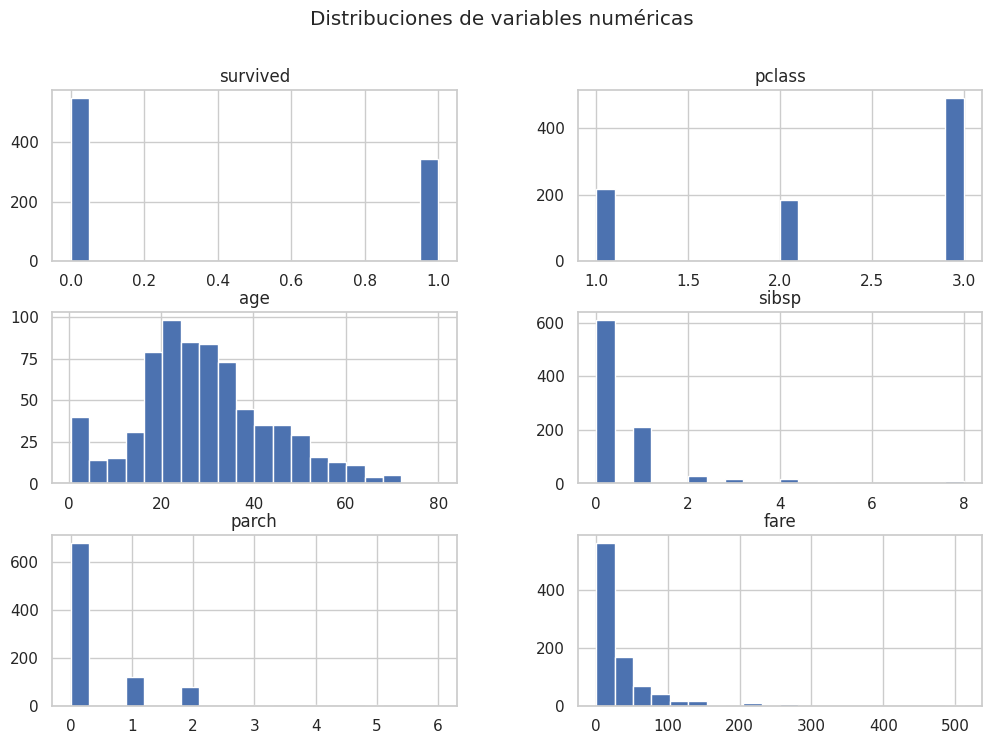

In [18]:
# Histogramas para todas las numéricas
df.select_dtypes(include='number').hist(bins=20, figsize=(12,8))
plt.suptitle('Distribuciones de variables numéricas')
plt.show()

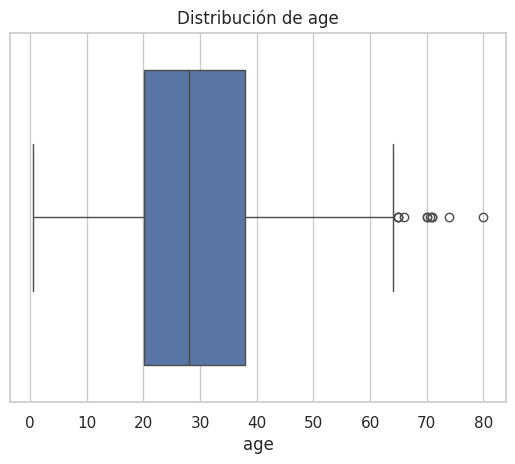

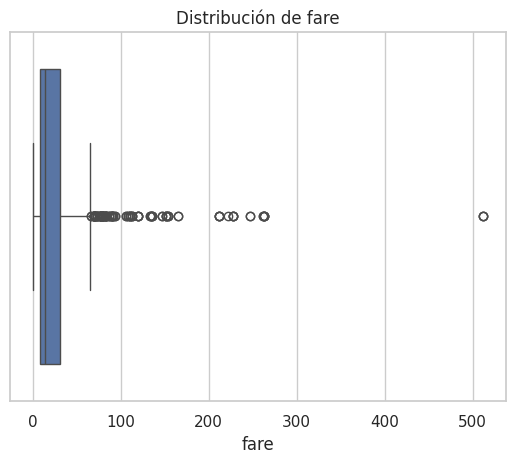

In [19]:
# Boxplots para outliers
for col in ['age', 'fare']:
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.show()

### 4.7 Visualizaciones de relaciones y correlaciones

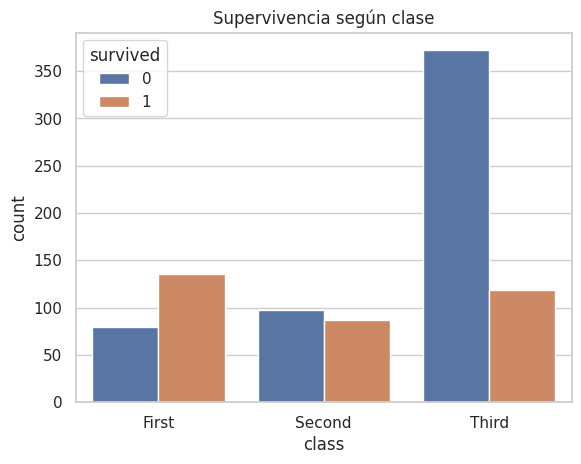

In [20]:
sns.countplot(x='class', hue='survived', data=df)
plt.title('Supervivencia según clase')
plt.show()

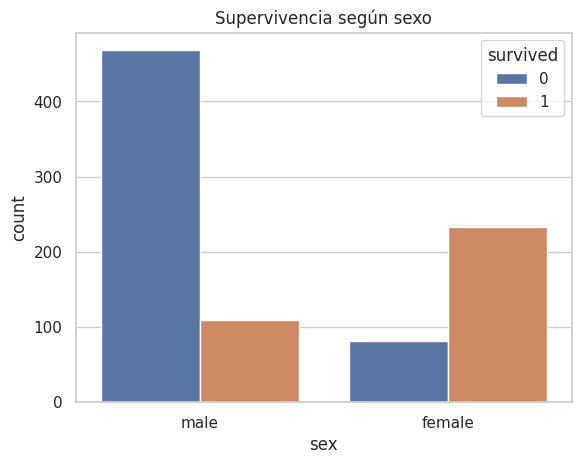

In [23]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Supervivencia según sexo')
plt.show()

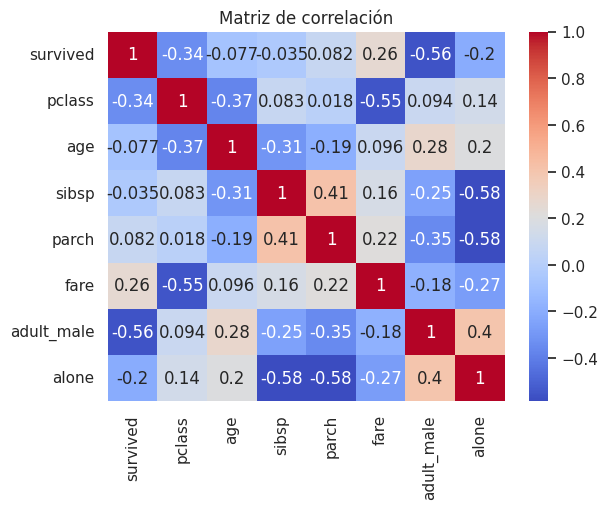

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## 5) Conclusiones

- El dataset contiene varias variables con valores nulos (`age`, `embark_town`, `deck`).
- Hay 107 filas duplicadas.
- Existen outliers especialmente en la tarifa (`fare`).
- La clase (`class`) y el sexo (`sex`) parecen influir fuertemente en la supervivencia.

> Este análisis sienta las bases para tomar decisiones informadas sobre limpieza, preprocesamiento y diseño de modelos en etapas futuras.